<a href="https://colab.research.google.com/github/jtabalon/mobile_price_classification/blob/main/Mobile_Project_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Price Range of Phones Based on features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
test = pd.read_csv('/test.csv')
train = pd.read_csv('/train.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [8]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [9]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
len(train)
len(test)

1000

In [11]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [12]:
test.isnull().values.any()

False

In [13]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
train.shape

(2000, 21)

In [15]:
z =train.iloc[:,13:14]
z.head(0)

,ram


In [16]:
#3 is the the high price range 1 is the low price range
train[train['ram'] == 3998]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
940,1456,0,1.6,1,9,1,39,0.1,80,8,10,815,1666,3998,6,3,13,1,1,0,3


In [17]:
y = train.iloc[:,20]
x = train.iloc[:,0]

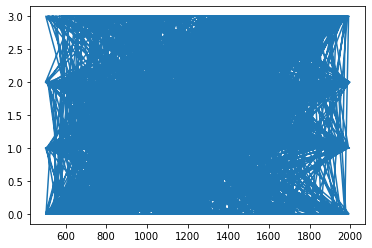

In [29]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x,y)

In [19]:
y.describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [20]:
x.to_numpy

<bound method IndexOpsMixin.to_numpy of 0        842
1       1021
2        563
3        615
4       1821
        ... 
1995     794
1996    1965
1997    1911
1998    1512
1999     510
Name: battery_power, Length: 2000, dtype: int64>

In [28]:
#3 is the the high price range 1 is the low price range
x_1= train['battery_power']
x_2 = train['fc']
x_3 = train['int_memory']
x_4 = train['mobile_wt']
x_5 = train ['n_cores']
x_6 = train['pc']
x_7 = train['px_height']
x_8 = train['px_width']
x_9 = train['ram']
x_10 = train['sc_h']
x_11 = train['sc_w']
x_12 = train['talk_time']

0     842
1    1021
2     563
3     615
4    1821
Name: battery_power, dtype: int64

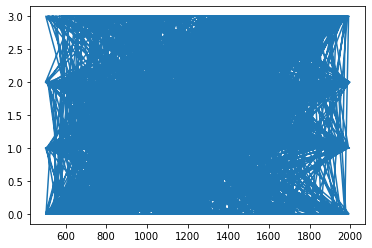

In [30]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_1,y)

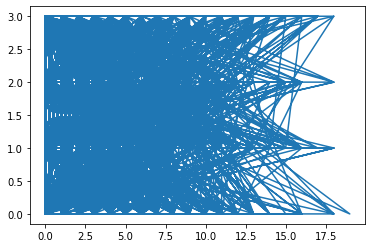

In [31]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_2,y)

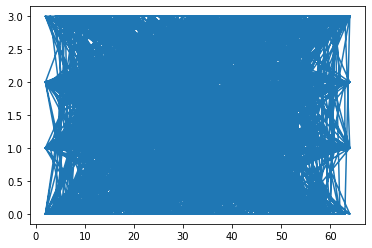

In [32]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_3,y)

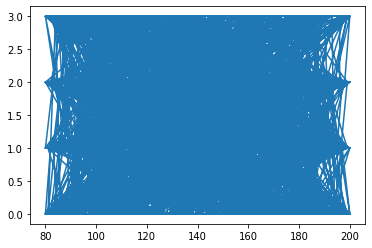

In [33]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_4,y)

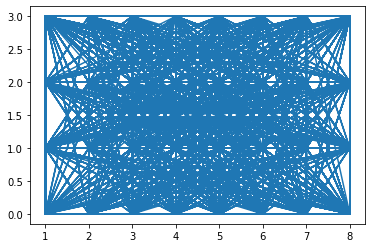

In [34]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_5,y)

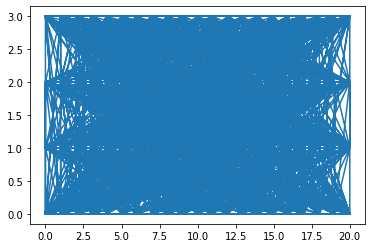

In [35]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_6,y)

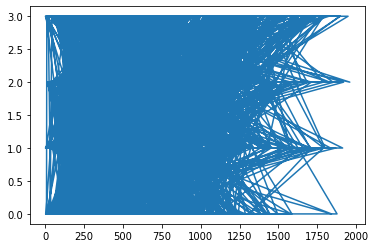

In [36]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_7,y)

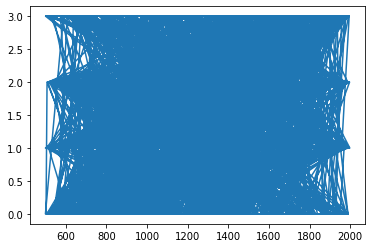

In [37]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_8,y)

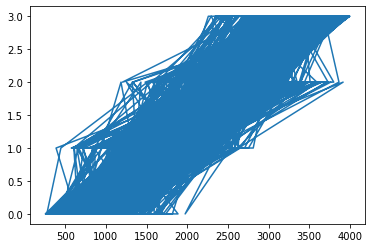

In [38]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_9,y)

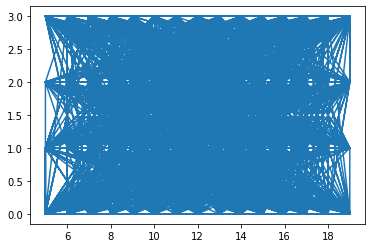

In [39]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_10,y)

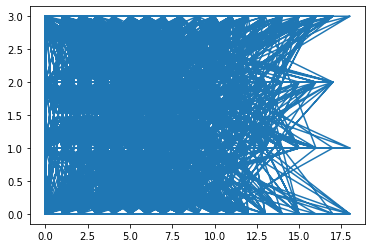

In [40]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_11,y)

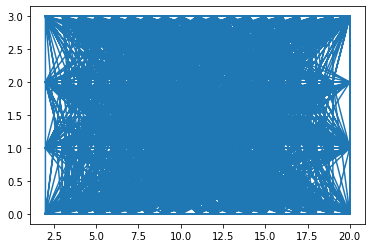

In [41]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_12,y)

In [47]:
train[train['fc'] >=17.5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,19,846,1144,593,9,4,18,1,1,1,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1,1
1693,695,0,0.5,0,18,1,12,0.6,196,2,19,1649,1829,2855,16,13,7,1,1,1,2
1705,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,20,334,896,2522,10,5,2,1,0,1,2


In [52]:
train[train['px_height'] >= 1760]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
107,1657,1,2.4,0,3,0,42,0.1,198,5,16,1770,1796,2597,18,1,14,1,0,0,3
148,1216,0,3.0,0,4,0,47,0.4,199,3,7,1852,1967,2268,13,5,4,0,1,1,2
260,754,0,0.5,1,7,1,59,0.7,178,7,10,1914,1928,1027,6,3,5,1,0,0,1
274,793,0,1.0,1,5,1,30,0.9,133,2,15,1858,1935,2332,17,13,14,1,1,1,2
292,1995,1,1.9,0,6,0,9,0.8,139,6,18,1830,1963,1203,14,12,18,1,1,1,2
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
443,1448,0,1.4,1,13,0,26,1.0,156,3,16,1792,1850,1175,12,9,6,0,1,0,1
483,1476,0,0.5,0,0,1,43,0.7,148,2,2,1789,1972,3644,15,10,6,1,0,1,3
520,1875,1,0.5,1,11,1,55,0.7,91,1,17,1802,1942,2712,7,2,6,1,0,1,3
662,1695,0,0.5,1,6,1,46,0.7,200,3,9,1791,1898,446,16,13,15,1,1,1,1


In [53]:
train[train['sc_w']>= 17.5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
369,1725,0,0.5,1,8,1,52,1.0,185,6,12,1125,1195,1243,19,18,5,1,1,1,1
393,1375,1,1.1,0,3,1,9,0.9,145,7,19,475,726,3869,19,18,10,1,1,1,3
1060,1408,1,2.5,0,3,0,32,0.1,151,4,6,875,982,3162,19,18,3,1,0,0,3
1254,1083,0,1.0,0,6,0,52,0.9,126,2,20,925,1469,681,19,18,19,1,1,1,0
1420,904,0,2.7,1,4,0,19,0.6,147,6,7,1094,1496,545,19,18,16,0,0,0,0
1645,1940,1,1.0,1,0,1,5,0.2,194,4,1,588,1809,820,19,18,3,1,1,1,1
1807,713,0,1.4,1,4,0,53,0.8,98,1,17,123,1477,1462,19,18,13,1,0,1,0
1972,1191,0,0.8,0,6,1,46,0.8,89,6,9,42,807,824,19,18,7,1,0,0,0


In [54]:
pd.get_dummies(train, columns = ['price_range'])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_0,price_range_1,price_range_2,price_range_3
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0,1,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,0,0,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,0,0,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,0,0,1,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,1,0,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,0,0,1,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,0,0,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,1,0,0,0
